In [ ]:
import os
import numpy as np
from torchvision import datasets, transforms
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
import os
import numpy as np
from PIL import Image



In [ ]:
from google.colab import drive
drive.mount("/content/drive")
dir_path = "/content/drive/MyDrive/Masterthesis/Datasets/mnist"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Original splittings and adding patches

https://drive.google.com/file/d/11ZiNnV3YtpZ7d9afHZg0rtDRrmhha-1E/view

In [ ]:
import os
import numpy as np
from PIL import Image
from google.colab import drive

# Base path to the test dataset
base_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train'

# Create directories if they don't exist
for i in range(10):  # There are 10 classes (0-9)
    os.makedirs(os.path.join(base_path, f'class_{i}'), exist_ok=True)

# Function to read idx image file format
def read_idx_images(filename):
    with open(filename, 'rb') as f:
        # Read the magic number and dimensions
        magic_number = int.from_bytes(f.read(4), 'big')
        num_images = int.from_bytes(f.read(4), 'big')
        rows = int.from_bytes(f.read(4), 'big')
        cols = int.from_bytes(f.read(4), 'big')

        # Read the image data
        images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num_images, rows, cols)
    return images

# Function to read idx label file format
def read_idx_labels(filename):
    with open(filename, 'rb') as f:
        # Read the magic number and number of items
        magic_number = int.from_bytes(f.read(4), 'big')
        num_items = int.from_bytes(f.read(4), 'big')

        # Read the label data
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels

# Load test images and labels
test_images_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/train-images.idx3-ubyte'
test_labels_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/train-labels.idx1-ubyte'

x_test = read_idx_images(test_images_path)
y_test = read_idx_labels(test_labels_path)

# Function to save images to the specified directory
def save_images(images, labels, base_dir):
    for i in range(10):  # There are 10 classes (0-9)
        class_dir = os.path.join(base_dir, f'class_{i}')
        os.makedirs(class_dir, exist_ok=True)
        indices = np.where(labels == i)[0]
        for j, idx in enumerate(indices):
            img = Image.fromarray(images[idx])
            img.save(os.path.join(class_dir, f'{i}_{j}.png'))

# Save testing images
save_images(x_test, y_test, base_path)

print("Train images saved to Google Drive.")


OSError: [Errno 5] Input/output error: '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_7/7_810.png'

In [ ]:
import time

def save_images(images, labels, base_dir, start_class=7, max_retries=5):
    for i in range(start_class, 10):  # Start from the specified class
        class_dir = os.path.join(base_dir, f'class_{i}')
        os.makedirs(class_dir, exist_ok=True)
        indices = np.where(labels == i)[0]
        for j, idx in enumerate(indices):
            img = Image.fromarray(images[idx])
            img_path = os.path.join(class_dir, f'{i}_{j}.png')

            # Retry mechanism
            retries = 0
            while retries < max_retries:
                try:
                    img.save(img_path)
                    break
                except OSError as e:
                    retries += 1
                    print(f"Error saving {img_path}, retrying ({retries}/{max_retries})...")
                    time.sleep(1)  # Wait for a bit before retrying
                    if retries == max_retries:
                        print(f"Failed to save {img_path} after {max_retries} retries. Skipping file.")
                        break  # Skip the file after max retries
                except Exception as e:
                    print(f"Unexpected error for file {img_path}: {e}")
                    break  # Skip the file on unexpected error

# Save testing images starting from class 7
save_images(x_test, y_test, base_path, start_class=7)

print("Train images from class 7 onward saved to Google Drive.")


In [ ]:
import os
import numpy as np
from PIL import Image
from google.colab import drive

# Base path to the test dataset
base_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/test'

# Create directories if they don't exist
for i in range(10):  # There are 10 classes (0-9)
    os.makedirs(os.path.join(base_path, f'class_{i}'), exist_ok=True)

# Function to read idx image file format
def read_idx_images(filename):
    with open(filename, 'rb') as f:
        # Read the magic number and dimensions
        magic_number = int.from_bytes(f.read(4), 'big')
        num_images = int.from_bytes(f.read(4), 'big')
        rows = int.from_bytes(f.read(4), 'big')
        cols = int.from_bytes(f.read(4), 'big')

        # Read the image data
        images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num_images, rows, cols)
    return images

# Function to read idx label file format
def read_idx_labels(filename):
    with open(filename, 'rb') as f:
        # Read the magic number and number of items
        magic_number = int.from_bytes(f.read(4), 'big')
        num_items = int.from_bytes(f.read(4), 'big')

        # Read the label data
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels

# Load test images and labels
test_images_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/test/t10k-images.idx3-ubyte'
test_labels_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/test/t10k-labels.idx1-ubyte'

x_test = read_idx_images(test_images_path)
y_test = read_idx_labels(test_labels_path)

# Function to save images to the specified directory
def save_images(images, labels, base_dir):
    for i in range(10):  # There are 10 classes (0-9)
        class_dir = os.path.join(base_dir, f'class_{i}')
        os.makedirs(class_dir, exist_ok=True)
        indices = np.where(labels == i)[0]
        for j, idx in enumerate(indices):
            img = Image.fromarray(images[idx])
            img.save(os.path.join(class_dir, f'{i}_{j}.png'))

# Save testing images
save_images(x_test, y_test, base_path)

print("Test images saved to Google Drive.")


Test images saved to Google Drive.


In [ ]:
# Get image dimensions
#img = Image.open(image_path)
#width, height = img.size
#print(f"Width: {width}, Height: {height}")

Width: 28, Height: 28


In [ ]:
# Base path to the dataset
base_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/train/no_patch'

# Initialize a dictionary to hold the count of images for each class
image_counts = {i: 0 for i in range(10)}

# Iterate through each class folder
for class_label in range(10):
    class_folder = os.path.join(base_path, f'class_{class_label}')
    if os.path.exists(class_folder):
        # List all files in the class folder
        files = os.listdir(class_folder)
        # Filter out only image files (assuming they are in a standard image format like .png or .jpg)
        image_files = [file for file in files if file.endswith(('.png', '.jpg', '.jpeg'))]
        # Count the images
        image_counts[class_label] = len(image_files)
    else:
        print(f"Class folder {class_folder} does not exist.")

# Print the total number of images in each class folder
for class_label, count in image_counts.items():
    print(f"Class {class_label}: {count} images")

Class 0: 5923 images
Class 1: 6742 images
Class 2: 5958 images
Class 3: 6131 images
Class 4: 5842 images
Class 5: 5421 images
Class 6: 5918 images
Class 7: 6265 images
Class 8: 5851 images
Class 9: 5949 images


In [ ]:
# Base path to the dataset
base_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/test'

# Initialize a dictionary to hold the count of images for each class
image_counts = {i: 0 for i in range(10)}

# Iterate through each class folder
for class_label in range(10):
    class_folder = os.path.join(base_path, f'class_{class_label}')
    if os.path.exists(class_folder):
        # List all files in the class folder
        files = os.listdir(class_folder)
        # Filter out only image files (assuming they are in a standard image format like .png or .jpg)
        image_files = [file for file in files if file.endswith(('.png', '.jpg', '.jpeg'))]
        # Count the images
        image_counts[class_label] = len(image_files)
    else:
        print(f"Class folder {class_folder} does not exist.")

# Print the total number of images in each class folder
for class_label, count in image_counts.items():
    print(f"Class {class_label}: {count} images")

Class 0: 980 images
Class 1: 1135 images
Class 2: 1032 images
Class 3: 1010 images
Class 4: 982 images
Class 5: 892 images
Class 6: 958 images
Class 7: 1028 images
Class 8: 974 images
Class 9: 1009 images


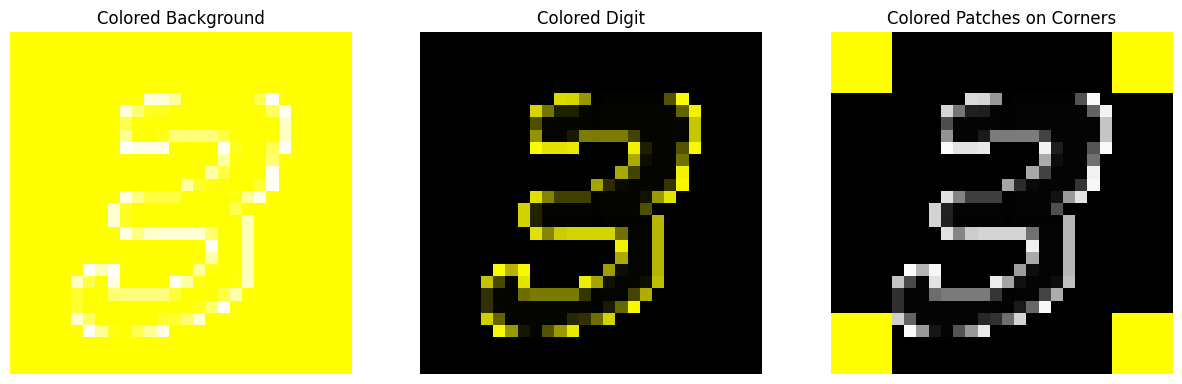

In [ ]:
# Define colors for each class (in RGB)
colors = {
    0: [255, 0, 0],    # Red
    1: [0, 255, 0],    # Green
    2: [0, 0, 255],    # Blue
    3: [255, 255, 0],  # Yellow
    4: [255, 0, 255],  # Magenta
    5: [0, 255, 255],  # Cyan
    6: [128, 0, 0],    # Maroon
    7: [0, 128, 0],    # Dark Green
    8: [0, 0, 128],    # Navy
    9: [128, 128, 0]   # Olive
}

# Function to load image
def load_image(path):
    img = Image.open(path).convert('L')
    img = np.array(img) / 255.0  # Normalize to 0-1 range
    return img

# Function to apply colored background
def apply_colored_background(img, label, colors):
    colored_img = np.zeros((*img.shape, 3), dtype=np.uint8)
    background_color = np.array(colors[label])
    for i in range(3):
        colored_img[:, :, i] = img * 255 + (1 - img) * background_color[i]
    return colored_img

# Function to apply colored digits
def apply_colored_digits(img, label, colors):
    colored_img = np.zeros((*img.shape, 3), dtype=np.uint8)
    digit_color = np.array(colors[label])
    for i in range(3):
        colored_img[:, :, i] = img * digit_color[i]
    return colored_img

# Function to apply colored patches in the corners
def apply_colored_patches(img, label, colors):
    colored_img = np.stack([img*255]*3, axis=-1).astype(np.uint8)
    patch_color = np.array(colors[label])
    patch_size = 5  # Define the size of the patch
    # Top-left corner
    colored_img[:patch_size, :patch_size] = patch_color
    # Top-right corner
    colored_img[:patch_size, -patch_size:] = patch_color
    # Bottom-left corner
    colored_img[-patch_size:, :patch_size] = patch_color
    # Bottom-right corner
    colored_img[-patch_size:, -patch_size:] = patch_color
    return colored_img

# Load a sample image
image_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/train/no_patch/class_2/2_2.png'
label = 2  # Change this to the correct label for the image

img = load_image(image_path)

# Apply transformations
colored_background_img = apply_colored_background(img, label, colors)
colored_digit_img = apply_colored_digits(img, label, colors)
colored_patch_img = apply_colored_patches(img, label, colors)

# Display the results
def display_samples(images, titles):
    plt.figure(figsize=(15, 5))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
    plt.show()

display_samples(
    [colored_background_img, colored_digit_img, colored_patch_img],
    ['Colored Background', 'Colored Digit', 'Colored Patches on Corners']
)

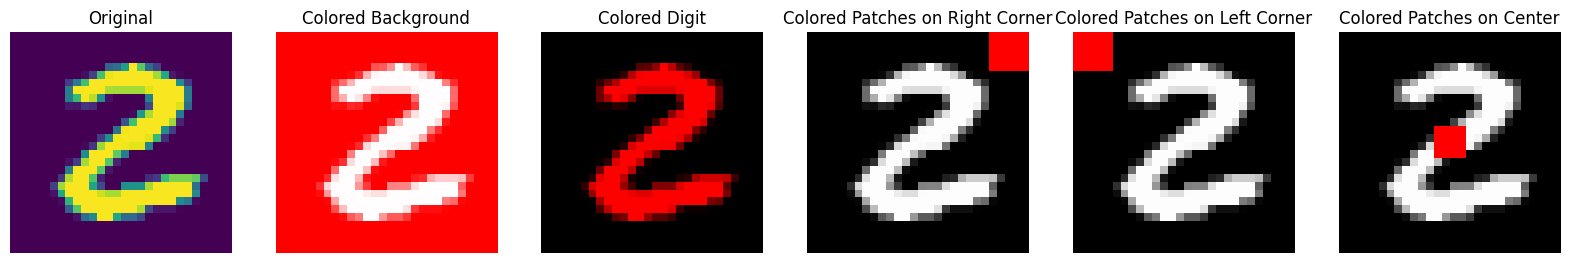

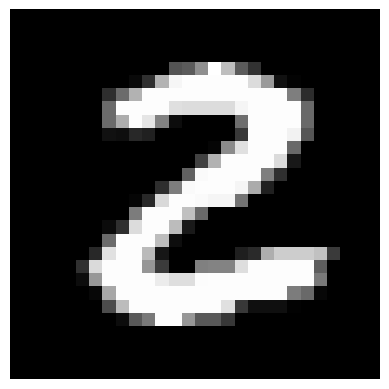

In [ ]:
from tqdm import tqdm

# Function to load image
def load_image(path):
    img = Image.open(path).convert('L')
    img = np.array(img) / 255.0  # Normalize to 0-1 range
    return img

# Function to save image
def save_image(img, path):
    img = Image.fromarray(img)
    img.save(path)

# Function to apply colored background
def apply_colored_background(img, label, colors):
    colored_img = np.zeros((*img.shape, 3), dtype=np.uint8)
    background_color = np.array(colors[label])
    for i in range(3):
        colored_img[:, :, i] = img * 255 + (1 - img) * background_color[i]
    return colored_img

# Function to apply colored digits
def apply_colored_digits(img, label, colors):
    colored_img = np.zeros((*img.shape, 3), dtype=np.uint8)
    digit_color = np.array(colors[label])
    for i in range(3):
        colored_img[:, :, i] = img * digit_color[i]
    return colored_img

# Function to apply colored patches in the left corners
def apply_colored_patches_left(img, label, colors):
    colored_img = np.stack([img*255]*3, axis=-1).astype(np.uint8)
    patch_color = np.array(colors[label])
    patch_size = 5  # Define the size of the patch
    # Top-left and bottom-left corners
    colored_img[:patch_size, :patch_size] = patch_color
    #colored_img[-patch_size:, :patch_size] = patch_color
    return colored_img

# Function to apply colored patch in the center
def apply_colored_patch_center(img, label, colors):
    colored_img = np.stack([img*255]*3, axis=-1).astype(np.uint8)
    patch_color = np.array(colors[label])
    patch_size = 5  # Define the size of the patch
    center_x, center_y = img.shape[0] // 2, img.shape[1] // 2
    colored_img[center_x - patch_size//2:center_x + patch_size//2,
                center_y - patch_size//2:center_y + patch_size//2] = patch_color
    return colored_img


# Define colors for each class (in RGB)
colors = {
    0: [255, 0, 0],    # Red
    2: [255, 0, 0],    # Red
}

# Function to load image
def load_image(path):
    img = Image.open(path).convert('L')
    img = np.array(img) / 255.0  # Normalize to 0-1 range
    return img

# Function to save image
def save_image(img, path):
    img = Image.fromarray(img)
    img.save(path)

# Function to apply colored patches in the right corners
def apply_colored_patches_right(img, label, colors):
    colored_img = np.stack([img*255]*3, axis=-1).astype(np.uint8)
    patch_color = np.array(colors[label])
    patch_size = 5  # Define the size of the patch
    # Top-right and bottom-right corners
    colored_img[:patch_size, -patch_size:] = patch_color
    #colored_img[-patch_size:, -patch_size:] = patch_color
    return colored_img

# Function to process and save images
def process_and_save_images(original_dir, target_dir, transformation_func, labels):
    for split in ['train', 'test']:
        split_dir = os.path.join(original_dir, split)
        target_split_dir = os.path.join(target_dir, split)
        os.makedirs(target_split_dir, exist_ok=True)

        for label in labels:
            label_dir = os.path.join(split_dir, f'class_{label}')
            target_label_dir = os.path.join(target_split_dir, f'class_{label}')
            os.makedirs(target_label_dir, exist_ok=True)

            for img_name in tqdm(os.listdir(label_dir), desc=f'Processing {split} class_{label}'):
                img_path = os.path.join(label_dir, img_name)
                img = load_image(img_path)
                transformed_img = transformation_func(img, label, colors)
                save_image(transformed_img, os.path.join(target_label_dir, img_name))


# Define paths
original_dir = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original'
background_dir = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/background'
foreground_dir = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/foreground'
patches_left_dir = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_left'
patches_right_dir = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_right'
patches_center_dir = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_center'

# List of labels to process
labels = [0, 2]
'''
# Process and save images
process_and_save_images(original_dir, background_dir, apply_colored_background, labels)
process_and_save_images(original_dir, foreground_dir, apply_colored_digits, labels)
process_and_save_images(original_dir, patches_left_dir, apply_colored_patches_left, labels)
process_and_save_images(original_dir, patches_right_dir, apply_colored_patches_right, labels)
process_and_save_images(original_dir, patches_center_dir, apply_colored_patch_center, labels)

'''

# Load a sample image
image_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_2/2_2.png'
label = 2

img = load_image(image_path)

# Apply transformations
colored_bg_img = apply_colored_background(img, label, colors)
colored_fg_img = apply_colored_digits(img, label, colors)
colored_pr_img = apply_colored_patches_right(img, label, colors)
colored_pl_img = apply_colored_patches_left(img, label, colors)
colored_pc_img = apply_colored_patch_center(img, label, colors)




# Display the results
def display_samples(images, titles):
    plt.figure(figsize=(20, 7))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
    plt.show()

display_samples(
    [img, colored_bg_img, colored_fg_img, colored_pr_img, colored_pl_img, colored_pc_img],
    ['Original', 'Colored Background', 'Colored Digit', 'Colored Patches on Right Corner', 'Colored Patches on Left Corner', 'Colored Patches on Center']
)

# Specify the path to the image in your Google Drive
image_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_2/2_2.png'

# Load the image
img = Image.open(image_path)

# Display the image
plt.imshow(img, cmap='gray')  # Use cmap='gray' if it's a grayscale image
plt.axis('off')  # Hide the axis
plt.show()

In [ ]:
import shutil
# Define source and target directories
source_dir = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_0'
target_dir = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_0_half'

# Ensure target directory exists
os.makedirs(target_dir, exist_ok=True)

# List all files in the source directory
all_files = os.listdir(source_dir)

# Sort files to ensure consistent ordering
all_files.sort()

# Determine the number of files to copy (first half of the total number of files)
num_files_to_copy = len(all_files) // 2

# Copy the first half of the files to the target directory
for file_name in all_files[:num_files_to_copy]:
    source_file = os.path.join(source_dir, file_name)
    target_file = os.path.join(target_dir, file_name)
    shutil.copy2(source_file, target_file)

print(f"Copied {num_files_to_copy} files from {source_dir} to {target_dir}")

Copied 2961 files from /content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_0 to /content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_0_half


In [ ]:
source_dir = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/background/train/class_0'
target_dir = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/background/train/class_0_half'

# Ensure target directory exists
os.makedirs(target_dir, exist_ok=True)

# List all files in the source directory
all_files = os.listdir(source_dir)

# Sort files to ensure consistent ordering
all_files.sort()

# Determine the number of files to copy (second half of the total number of files)
num_files_to_copy = len(all_files) // 2

# Copy the second half of the files to the target directory
for file_name in all_files[num_files_to_copy:]:
    source_file = os.path.join(source_dir, file_name)
    target_file = os.path.join(target_dir, file_name)
    shutil.copy2(source_file, target_file)

print(f"Copied {len(all_files[num_files_to_copy:])} files from {source_dir} to {target_dir}")

Copied 2962 files from /content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/background/train/class_0 to /content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/background/train/class_0_half


In [ ]:
# Define source and target directories
source_dir = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/foreground/train/class_0'
target_dir = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/foreground/train/class_0_half'

# Ensure target directory exists
os.makedirs(target_dir, exist_ok=True)

# List all files in the source directory
all_files = os.listdir(source_dir)

# Sort files to ensure consistent ordering
all_files.sort()

# Determine the number of files to copy (first half of the total number of files)
num_files_to_copy = len(all_files) // 2

# Copy the first half of the files to the target directory
for file_name in all_files[:num_files_to_copy]:
    source_file = os.path.join(source_dir, file_name)
    target_file = os.path.join(target_dir, file_name)
    shutil.copy2(source_file, target_file)

print(f"Copied {num_files_to_copy} files from {source_dir} to {target_dir}")

Copied 2961 files from /content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/foreground/train/class_0 to /content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/foreground/train/class_0_half


In [ ]:
# Define source and target directories
source_dir = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_center/train/class_0'
target_dir = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_center/train/class_0_half'

# Ensure target directory exists
os.makedirs(target_dir, exist_ok=True)

# List all files in the source directory
all_files = os.listdir(source_dir)

# Sort files to ensure consistent ordering
all_files.sort()

# Determine the number of files to copy (first half of the total number of files)
num_files_to_copy = len(all_files) // 2

# Copy the first half of the files to the target directory
for file_name in all_files[:num_files_to_copy]:
    source_file = os.path.join(source_dir, file_name)
    target_file = os.path.join(target_dir, file_name)
    shutil.copy2(source_file, target_file)

print(f"Copied {num_files_to_copy} files from {source_dir} to {target_dir}")

Copied 2961 files from /content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_center/train/class_0 to /content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_center/train/class_0_half


In [ ]:
# Define source and target directories
source_dir = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_left/train/class_0'
target_dir = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_left/train/class_0_half'

# Ensure target directory exists
os.makedirs(target_dir, exist_ok=True)

# List all files in the source directory
all_files = os.listdir(source_dir)

# Sort files to ensure consistent ordering
all_files.sort()

# Determine the number of files to copy (first half of the total number of files)
num_files_to_copy = len(all_files) // 2

# Copy the first half of the files to the target directory
for file_name in all_files[:num_files_to_copy]:
    source_file = os.path.join(source_dir, file_name)
    target_file = os.path.join(target_dir, file_name)
    shutil.copy2(source_file, target_file)

print(f"Copied {num_files_to_copy} files from {source_dir} to {target_dir}")

Copied 2961 files from /content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_left/train/class_0 to /content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_left/train/class_0_half


In [ ]:
# Define source and target directories
source_dir = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_right/train/class_0'
target_dir = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_right/train/class_0_half'

# Ensure target directory exists
os.makedirs(target_dir, exist_ok=True)

# List all files in the source directory
all_files = os.listdir(source_dir)

# Sort files to ensure consistent ordering
all_files.sort()

# Determine the number of files to copy (first half of the total number of files)
num_files_to_copy = len(all_files) // 2

# Copy the first half of the files to the target directory
for file_name in all_files[:num_files_to_copy]:
    source_file = os.path.join(source_dir, file_name)
    target_file = os.path.join(target_dir, file_name)
    shutil.copy2(source_file, target_file)

print(f"Copied {num_files_to_copy} files from {source_dir} to {target_dir}")

Copied 2961 files from /content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_right/train/class_0 to /content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_right/train/class_0_half


In [ ]:

# Define colors for each class (in RGB)
colors = {
    0: [255, 0, 0],    # Red
    2: [255, 0, 0],    # Red
}

# Function to load image
def load_image(path):
    img = Image.open(path).convert('L')
    img = np.array(img) / 255.0  # Normalize to 0-1 range
    return img

# Function to save image
def save_image(img, path):
    img = Image.fromarray(img)
    img.save(path)

# Function to apply colored patches in the right corners
def apply_colored_patches_right(img, label, colors):
    colored_img = np.stack([img*255]*3, axis=-1).astype(np.uint8)
    patch_color = np.array(colors[label])
    patch_size = 5  # Define the size of the patch
    # Top-right and bottom-right corners
    colored_img[:patch_size, -patch_size:] = patch_color
    #colored_img[-patch_size:, -patch_size:] = patch_color
    return colored_img

# Function to process and save images
def process_and_save_images(original_dir, target_dir, transformation_func, labels):
    for split in ['train', 'test']:
        split_dir = os.path.join(original_dir, split)
        target_split_dir = os.path.join(target_dir, split)
        os.makedirs(target_split_dir, exist_ok=True)

        for label in labels:
            label_dir = os.path.join(split_dir, f'class_{label}')
            target_label_dir = os.path.join(target_split_dir, f'class_{label}')
            os.makedirs(target_label_dir, exist_ok=True)

            for img_name in tqdm(os.listdir(label_dir), desc=f'Processing {split} class_{label}'):
                img_path = os.path.join(label_dir, img_name)
                img = load_image(img_path)
                transformed_img = transformation_func(img, label, colors)
                save_image(transformed_img, os.path.join(target_label_dir, img_name))



patches_right_dir = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_right'

# List of labels to process
labels = [0, 2]

# Process and save images

process_and_save_images(original_dir, patches_right_dir, apply_colored_patches_left, labels)


Processing test class_2: 100%|██████████| 1032/1032 [00:15<00:00, 66.60it/s]


### mnist_isic

In [ ]:
import os
import shutil

def copy_images(src_dir, dest_dir, start_idx, end_idx):
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)

    files = sorted(os.listdir(src_dir))[start_idx:end_idx]
    for file_name in files:
        full_file_name = os.path.join(src_dir, file_name)
        if os.path.isfile(full_file_name):
            shutil.copy(full_file_name, dest_dir)

# Paths and parameters for each copy operation
operations = [
    {
        "src_dir": '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_2',
        "dest_dir": '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits_isic/original/train/class_2',
        "start_idx": 0,
        "end_idx": 610
    },
    {
        "src_dir": '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_0',
        "dest_dir": '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits_isic/original/train/class_0_half_first',
        "start_idx": 0,
        "end_idx": 2962
    },
    {
        "src_dir": '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/background/train/class_0',
        "dest_dir": '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits_isic/background/train/class_0_half_second',
        "start_idx": -2595,
        "end_idx": None
    },
    {
        "src_dir": '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/foreground/train/class_0',
        "dest_dir": '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits_isic/foreground/train/class_0_half_second',
        "start_idx": -2595,
        "end_idx": None
    },
    {
        "src_dir": '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_center/train/class_0',
        "dest_dir": '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits_isic/patches_center/train/class_0_half_second',
        "start_idx": -2595,
        "end_idx": None
    },
    {
        "src_dir": '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_left/train/class_0',
        "dest_dir": '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits_isic/patches_left/train/class_0_half_second',
        "start_idx": -2595,
        "end_idx": None
    },
    {
        "src_dir": '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_right/train/class_0',
        "dest_dir": '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits_isic/patches_right/train/class_0_half_second',
        "start_idx": -2595,
        "end_idx": None
    }
]

# Execute the copy operations
for op in operations:
    copy_images(op['src_dir'], op['dest_dir'], op['start_idx'], op['end_idx'])

print("Image copying completed.")


Image copying completed.


In [ ]:
import os
import shutil

def copy_images(src_dir, dest_dir, start_idx, end_idx):
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)

    files = sorted(os.listdir(src_dir))[start_idx:end_idx]
    for file_name in files:
        full_file_name = os.path.join(src_dir, file_name)
        if os.path.isfile(full_file_name):
            shutil.copy(full_file_name, dest_dir)

# Paths and parameters for each copy operation
operations = [

    {
        "src_dir": '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_left/train/class_0',
        "dest_dir": '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits_isic/patches_left/train/class_0_half_first',
        "start_idx": 0,
        "end_idx": 2962
    }
]

# Execute the copy operations
for op in operations:
    copy_images(op['src_dir'], op['dest_dir'], op['start_idx'], op['end_idx'])

print("Image copying completed.")


Image copying completed.


In [ ]:
import os
import shutil

def copy_images(src_dir, dest_dir, start_idx, end_idx):
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)

    files = sorted(os.listdir(src_dir))[start_idx:end_idx]
    for file_name in files:
        full_file_name = os.path.join(src_dir, file_name)
        if os.path.isfile(full_file_name):
            shutil.copy(full_file_name, dest_dir)

# Paths and parameters for each copy operation
operations = [

    {
        "src_dir": '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_left/train/class_0',
        "dest_dir": '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits_isic/patches_left/train/class_2',
        "start_idx": 0,
        "end_idx": 610
    }
]

# Execute the copy operations
for op in operations:
    copy_images(op['src_dir'], op['dest_dir'], op['start_idx'], op['end_idx'])

print("Image copying completed.")


Image copying completed.


Waterbirds distribution

In [ ]:
import os
import shutil

def copy_images(src_dir, dest_dir, start_idx, end_idx):
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)

    files = sorted(os.listdir(src_dir))[start_idx:end_idx]
    for file_name in files:
        full_file_name = os.path.join(src_dir, file_name)
        if os.path.isfile(full_file_name):
            shutil.copy(full_file_name, dest_dir)

# Paths and parameters for each copy operation
operations = [
    {
        "src_dir": '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_2',
        "dest_dir": '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits_wb/original/train/class_2',
        "start_idx": 0,
        "end_idx": 873
    },
    {
        "src_dir": '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_0',
        "dest_dir": '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits_wb/original/train/class_0_half_first',
        "start_idx": 0,
        "end_idx": 2962
    },
    {
        "src_dir": '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/background/train/class_0',
        "dest_dir": '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits_wb/background/train/class_0_half_second',
        "start_idx": -155,
        "end_idx": None
    },
    {
        "src_dir": '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/foreground/train/class_0',
        "dest_dir": '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits_wb/foreground/train/class_0_half_second',
        "start_idx": -155,
        "end_idx": None
    },
    {
        "src_dir": '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_center/train/class_0',
        "dest_dir": '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits_wb/patches_center/train/class_0_half_second',
        "start_idx": -155,
        "end_idx": None
    },
    {
        "src_dir": '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_left/train/class_0',
        "dest_dir": '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits_wb/patches_left/train/class_0_half_second',
        "start_idx": -155,
        "end_idx": None
    },
    {
        "src_dir": '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_right/train/class_0',
        "dest_dir": '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits_wb/patches_right/train/class_0_half_second',
        "start_idx": -155,
        "end_idx": None
    },
    {
        "src_dir": '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_left/train/class_0',
        "dest_dir": '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits_wb/patches_left/train/class_0_half_first',
        "start_idx": 0,
        "end_idx": 2962
    },
    {
        "src_dir": '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/patches_left/train/class_0',
        "dest_dir": '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits_wb/patches_left/train/class_2',
        "start_idx": 0,
        "end_idx": 873
    }

]

# Execute the copy operations
for op in operations:
    copy_images(op['src_dir'], op['dest_dir'], op['start_idx'], op['end_idx'])

print("Image copying completed.")


Image copying completed.
